#### Drug Classification
Predicting the drugs that is accurate for the patient

* 1.1 Exploration of Data

In [250]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [251]:
df = pd.read_csv('drug.csv');
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [252]:
# checking the unique value of each features
print(df["Age"].unique())
print(df["Sex"].unique())
print(df["Cholesterol"].unique())
print(df["BP"].unique())
print(df["Na_to_K"].unique())
print(df["Drug"].unique())
print(df.dtypes)

[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
['F' 'M']
['HIGH' 'NORMAL']
['HIGH' 'LOW' 'NORMAL']
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294  8.968 11.953 20.013  9.677 

In [253]:
## checking the counts of the Drug feature
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### 2. Data Pre-processing

* 2.1 Data Cleaning

* 2.1.1 Drop Duplicates

In [254]:
# check the shape of the df
df.shape

(200, 6)

In [255]:
#dropping duplicates

df = df.drop_duplicates()

In [256]:
df.shape

(200, 6)

* 2.1.2 Fill in missing values

In [257]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

We can see that the dataset do not have any missing values in any of its features

* 2.1.3 Removing extreme values

In [258]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


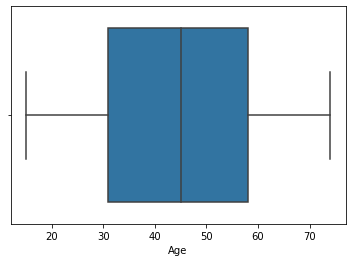

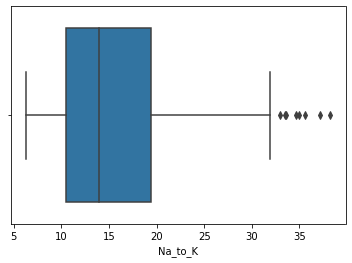

In [259]:
col = ['Age','Na_to_K']
## display outliers in boxplot
for c in col:
    plt.figure()
    sns.boxplot(df[c])

Na_to_K is the only features that have outliers

In [260]:
def removeOutliers(df,c):
    q3 = df[c].quantile(.75);
    q1 = df[c].quantile(.25);
    IQR = q3 - q1;
    _max = q3 + (IQR * 1.5);
    _min = q1 - (IQR * 1.5);
    df.loc[df[c] < _min,c] = _min;
    df.loc[df[c] > _max,c] = _max;

In [261]:
removeOutliers(df,'Na_to_K')

C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

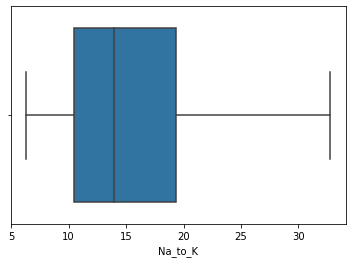

In [262]:
sns.boxplot(df['Na_to_K'])

In [263]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


* 2.2 Converting categorical features into numerical features

In [264]:
from sklearn.preprocessing import LabelEncoder

In [265]:
encoder = LabelEncoder()
df2 = df.copy()

In [266]:
c = ['Sex','BP','Cholesterol']
for cols in c:
    df2[cols] = encoder.fit_transform(df2[cols])

In [267]:
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [268]:
df2['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [269]:
df2['Drug']=df2['Drug'].map({'DrugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4})

In [270]:
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,1
196,16,1,1,0,12.006,1
197,52,1,2,0,9.894,2
198,23,1,2,1,14.020,2


In [271]:
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,1
196,16,1,1,0,12.006,1
197,52,1,2,0,9.894,2
198,23,1,2,1,14.020,2


All features are all numeric

In [272]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
df_scaled = df2.copy()
scaler = MinMaxScaler()

In [274]:
df2_col = ['Age','Sex','BP','Cholesterol','Na_to_K']
for col in df2_col:
    df2[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1))

In [275]:
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,1
196,16,1,1,0,12.006,1
197,52,1,2,0,9.894,2
198,23,1,2,1,14.020,2


<AxesSubplot:>

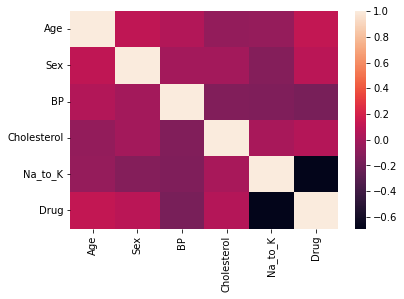

In [276]:
sns.heatmap(df_scaled.corr())

In [277]:
corr = df_scaled.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr,dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked) >.75]).sort_index()

In [278]:
corr_df

,,0


#### Data Modelling

* 3 Modelling

* 3.1 Split target variable to feature variables

In [279]:
X = df_scaled.drop(['Drug'],axis=1)
y = df_scaled['Drug']

* 3.2 Split our dataset to training and test

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75,stratify=y);

In [282]:
print(X_train.shape)
print(X_test.shape)

(150, 5)
(50, 5)


* 3.3 Choose the best model

In [283]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [284]:

def evaluate_model(model):
    print(classification_report(y_test,model.predict(X_test),target_names=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']))
    print(confusion_matrix(y_test,model.predict(X_test),labels=[0,1,2,3,4]))
    print('Training score: ', model.score(X_train,y_train))
    print('Test Score: ',model.score(X_test,y_test))

* 3.3.1 Gaussian Naive Bayes

In [285]:
from sklearn.naive_bayes import GaussianNB;
gnb = GaussianNB()
gnb.fit(X_train,y_train)
evaluate_model(gnb)

              precision    recall  f1-score   support

       DrugY       1.00      0.78      0.88        23
       drugC       0.57      1.00      0.73         4
       drugX       1.00      1.00      1.00        13
       drugA       0.75      1.00      0.86         6
       drugB       0.75      0.75      0.75         4

    accuracy                           0.88        50
   macro avg       0.81      0.91      0.84        50
weighted avg       0.92      0.88      0.88        50

[[18  3  0  1  1]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  3]]
Training score:  0.8666666666666667
Test Score:  0.88


* 3.3.2 BernoulliNB

In [286]:
from sklearn.naive_bayes import BernoulliNB;
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
evaluate_model(bnb)

              precision    recall  f1-score   support

       DrugY       0.50      0.87      0.63        23
       drugC       0.00      0.00      0.00         4
       drugX       0.70      0.54      0.61        13
       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         4

    accuracy                           0.54        50
   macro avg       0.24      0.28      0.25        50
weighted avg       0.41      0.54      0.45        50

[[20  0  3  0  0]
 [ 4  0  0  0  0]
 [ 6  0  7  0  0]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]]
Training score:  0.5133333333333333
Test Score:  0.54


C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* 3.3.3 DecisionTreeClassifier

In [303]:
from sklearn.tree import DecisionTreeClassifier;
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluate_model(dt)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.75      0.86         4

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50

[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  3]]
Training score:  1.0
Test Score:  0.98


* 3.3.4 Random Forest 

In [304]:
from sklearn.ensemble import RandomForestClassifier;
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_model(rf)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.75      0.86         4

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50

[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  3]]
Training score:  1.0
Test Score:  0.98


* 3.3.5 KNN

In [289]:
from sklearn.neighbors import KNeighborsClassifier;
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
evaluate_model(knn)

              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        23
       drugC       0.50      0.50      0.50         4
       drugX       0.67      0.77      0.71        13
       drugA       0.60      0.50      0.55         6
       drugB       0.50      0.25      0.33         4

    accuracy                           0.78        50
   macro avg       0.65      0.60      0.61        50
weighted avg       0.77      0.78      0.77        50

[[23  0  0  0  0]
 [ 0  2  1  1  0]
 [ 0  1 10  1  1]
 [ 0  1  2  3  0]
 [ 1  0  2  0  1]]
Training score:  0.8
Test Score:  0.78


* 3.3.6 LogisticRegression

In [290]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
evaluate_model(lr)

              precision    recall  f1-score   support

       DrugY       0.88      0.96      0.92        23
       drugC       1.00      0.50      0.67         4
       drugX       0.93      1.00      0.96        13
       drugA       0.67      0.67      0.67         6
       drugB       0.67      0.50      0.57         4

    accuracy                           0.86        50
   macro avg       0.83      0.72      0.76        50
weighted avg       0.86      0.86      0.85        50

[[22  0  1  0  0]
 [ 2  2  0  0  0]
 [ 0  0 13  0  0]
 [ 1  0  0  4  1]
 [ 0  0  0  2  2]]
Training score:  0.8933333333333333
Test Score:  0.86


C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter tuning / Cross Validation
To tune our model into a better model

In [291]:
from sklearn.model_selection import RandomizedSearchCV

* 4.1.1 Decision Tree Hyperparameter tuning

In [292]:
params= {
    "criterion": ['gini','entropy'],
    "splitter": ['best','random'],
    "max_depth": [5,10,15,20]
}

In [293]:
rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, 
n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [294]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'entropy'}

In [295]:
dt_tuned = DecisionTreeClassifier(
    splitter = 'best',
    max_depth = 20,
    criterion = 'gini'
)

dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [296]:
evaluate_model(dt_tuned)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.75      0.86         4

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50

[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  3]]
Training score:  1.0
Test Score:  0.98


In [297]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_tuned,X_train,y_train,cv=20)
scores.mean()

C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(


0.9857142857142858

* 4.1.2 Random Forest Hyperparameter tuning

In [298]:
rf_params= {
    "n_estimators": [5,10,15,20],
    "criterion": ['gini','entropy'],
    "min_samples_split": [2,4,6,8,10],
    "max_depth": [5,10,15,20]
}

In [299]:
rf_rsearch = RandomizedSearchCV(RandomForestClassifier(), rf_params, 
n_iter = 15, cv=10)
rf_rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [5, 10, 15, 20]})

In [300]:
rf_rsearch.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'max_depth': 20,
 'criterion': 'gini'}

In [301]:
rf_tuned = RandomForestClassifier(
    n_estimators = 15,
    criterion = 'entropy',
    min_samples_split = 2,
    max_depth = 20
)

rf_tuned.fit(X_train,y_train)
evaluate_model(rf_tuned)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.75      0.86         4

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50

[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  3]]
Training score:  1.0
Test Score:  0.98


In [302]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_tuned,X_train,y_train,cv=20)
scores.mean()

C:\Users\Jephthah\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=20.
  warnings.warn(


0.9794642857142858

### 5. Choosing a model
The Decision Tree and the Random Forest both got the accuracy of 98%, in their training score they got 100% while their test score they got 98%, we can conclude that the two models (Decision Tree & Random Forest) are the best model for this dataset.